In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson, chisquare

In [197]:
#FUNKCJE :
import numpy as np

def test_poisson(data):    
    lambda_ = data.mean()

    max_val = data.max()

    # oczekiwane prawdopodobieństwa dla każdej liczby zdarzeń
    expected_probs = [poisson.pmf(k, lambda_) for k in range(max_val + 1)]

    # przeliczamy na oczekiwane częstości
    expected_freq = np.array(expected_probs) * len(data)

    observed_freq = np.array([sum(data == k) for k in range(max_val + 1)])

    # przeskalowanie, aby suma zgadzała się z obserwacjami
    expected_freq = expected_freq * (observed_freq.sum() / expected_freq.sum())
    chi2, p = chisquare(f_obs=observed_freq, f_exp=expected_freq)

    return {'chi2':chi2,'p':p}, expected_probs,expected_freq

def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    filtered_df = df[~((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR)))]
    return filtered_df


In [198]:
pierwsza_połowa = [3,2,5,2,2,5,3,4,
                   6,1,5,6,4,1,10,4,
                   3,1,2,1,3,4,1,1,6,
                   3,1,5,2,2,4,5,0,
                   1,5,5,5,4,3,1,5,
                   3,5,7,3,2,6,1,2,
                   1,3,3,2,2,2,3,1,
                   4,2,2,1,1,2,3,3,
                   4,5,4,1,3,4,3,2,
                   0,3,2,6,3,4,4,4,
                   3,2,1,3,4,3,1,2,
                   3,4,5,2,4,3,0,1,
                   3,4,3,4,7,8,2,4,
                   2,2,2,2,3,1,1,2,
                   3,4,3,2,5,3,4,2,
                   5,5,4,1,2,7,3,5,
                   6,2,5,3,5,3,5,2,
                   2,1,4,2,6,4,4,
                   1,2,1,3,3,2,7,2,
                   1,3,1,1,4,4,0,3,
                   2,6,4,1,2,5,2,0,
                   5,3,7,1,5,1,5,3,
                   4,6,3,6,2,2,6,5,
                   2,4,1,5,2,3,1,3,
                   3,5,3,2,5,3,1,5,
                   2,2,1,1,1,5,7,1,
                   3,3,3,2,2,2,6,4,
                   4,5,6,1,4,2,3,2,
                   5,1,2,2,2,4,2,0,
                   2,1,3,2,3,0,5,3]
print(len(pierwsza_połowa))
8*30

240


240

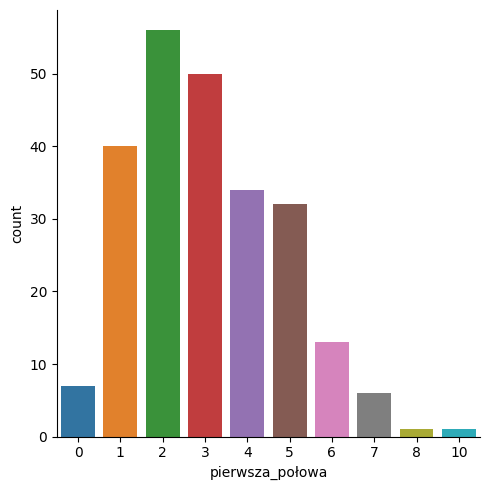

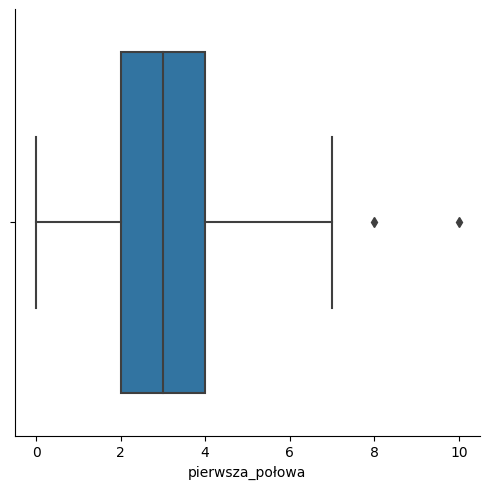

In [199]:
df_pierwsza = pd.DataFrame(pierwsza_połowa,columns = ['pierwsza_połowa'])
df_pierwsza.value_counts()
sns.catplot(kind = 'count', data = df_pierwsza, x='pierwsza_połowa')
sns.catplot(kind = 'box', data = df_pierwsza, x='pierwsza_połowa')

plt.show()
plt.close()


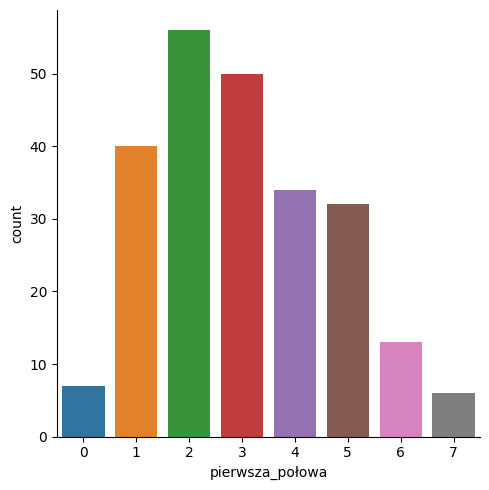

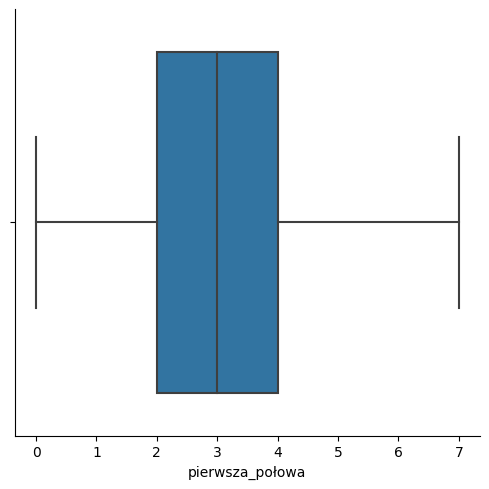

In [200]:
df_pierwsza_wo_outliers = pd.DataFrame()
df_pierwsza_wo_outliers['pierwsza_połowa'] = remove_outliers(df_pierwsza['pierwsza_połowa'])
sns.catplot(kind = 'count', data = df_pierwsza_wo_outliers, x='pierwsza_połowa')
sns.catplot(kind = 'box', data = df_pierwsza_wo_outliers, x='pierwsza_połowa')
plt.show()
plt.close()


In [201]:
print(test_poisson(df_pierwsza['pierwsza_połowa'])[0])
print(test_poisson(df_pierwsza_wo_outliers['pierwsza_połowa'])[0])

expected_freq = test_poisson(df_pierwsza['pierwsza_połowa'])[2]



{'chi2': 10.077337627458057, 'p': 0.4337346076972762}
{'chi2': 6.368777447318916, 'p': 0.4974080875902789}


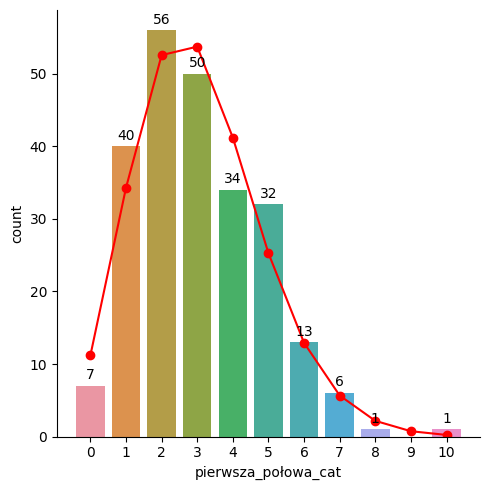

In [ ]:
import warnings
warnings.filterwarnings('ignore')

full_range = range(0, len(expected_freq))
df_pierwsza['pierwsza_połowa_cat'] = pd.Categorical(df_pierwsza['pierwsza_połowa'], categories=full_range)
g = sns.catplot(kind = 'count', data = df_pierwsza, x='pierwsza_połowa_cat')
ax = g.ax

# dodanie oczekiwanych wartości Poissona jako czerwone punkty
ax.plot(range(11), expected_freq, 'ro-', label='Poisson expected')

# dodanie liczby nad każdym słupkiem.
for p in ax.patches:
    height = p.get_height()
    if np.isnan(height):
        continue
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, int(height), ha='center', va='bottom')

plt.show()
plt.close()